In [93]:
import pandas as pd
from tabulate import tabulate


In [94]:
def function_to_plot(data_structure):
    table = tabulate(data_structure, headers='keys', tablefmt='fancy_grid')
    print(table)

In [95]:
data = pd.read_csv("data.csv")
data.columns = [
    'sex', 
    'length [mm]', 
    'diameter [mm]', 
    'height [mm]', 
    'whole weight [g]', 
    'shucked weight [g]', 
    'viscera weight [g]', 
    'shell weight [g]', 
    'rings'
]

data['sex'] = data['sex'].map({'M': 'Male', 'F': 'Female', 'I': 'Infant'})

gender_counts = data['sex'].value_counts().reset_index()
gender_counts.columns = ['', 'Count']
gender_counts['Percentage'] = (gender_counts['Count'] / gender_counts['Count'].sum() * 100).round(4)

function_to_plot(gender_counts)

╒════╤════════╤═════════╤══════════════╕
│    │        │   Count │   Percentage │
╞════╪════════╪═════════╪══════════════╡
│  0 │ Male   │    1527 │      36.5661 │
├────┼────────┼─────────┼──────────────┤
│  1 │ Infant │    1342 │      32.136  │
├────┼────────┼─────────┼──────────────┤
│  2 │ Female │    1307 │      31.2979 │
╘════╧════════╧═════════╧══════════════╛


In [96]:
### 2
summary_stats = data.describe().T
summary_stats = summary_stats.drop(columns=['count'])
function_to_plot(summary_stats)

╒════════════════════╤══════════╤═══════════╤════════╤══════════╤═════════╤══════════╤═════════╕
│                    │     mean │       std │    min │      25% │     50% │      75% │     max │
╞════════════════════╪══════════╪═══════════╪════════╪══════════╪═════════╪══════════╪═════════╡
│ length [mm]        │ 0.524009 │ 0.120103  │ 0.075  │ 0.45     │ 0.545   │  0.615   │  0.815  │
├────────────────────┼──────────┼───────────┼────────┼──────────┼─────────┼──────────┼─────────┤
│ diameter [mm]      │ 0.407892 │ 0.0992495 │ 0.055  │ 0.35     │ 0.425   │  0.48    │  0.65   │
├────────────────────┼──────────┼───────────┼────────┼──────────┼─────────┼──────────┼─────────┤
│ height [mm]        │ 0.139527 │ 0.0418264 │ 0      │ 0.115    │ 0.14    │  0.165   │  1.13   │
├────────────────────┼──────────┼───────────┼────────┼──────────┼─────────┼──────────┼─────────┤
│ whole weight [g]   │ 0.828818 │ 0.490424  │ 0.002  │ 0.4415   │ 0.79975 │  1.15325 │  2.8255 │
├────────────────────┼────────

### 3
there is only one qualitative variable: sex

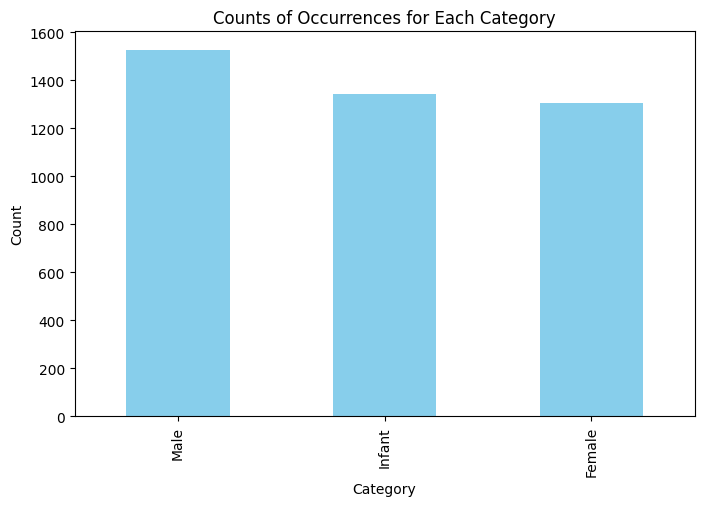

In [97]:
import matplotlib.pyplot as plt

counts = data['sex'].value_counts()

plt.figure(figsize=(8, 5))
counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Occurrences for Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


### 4


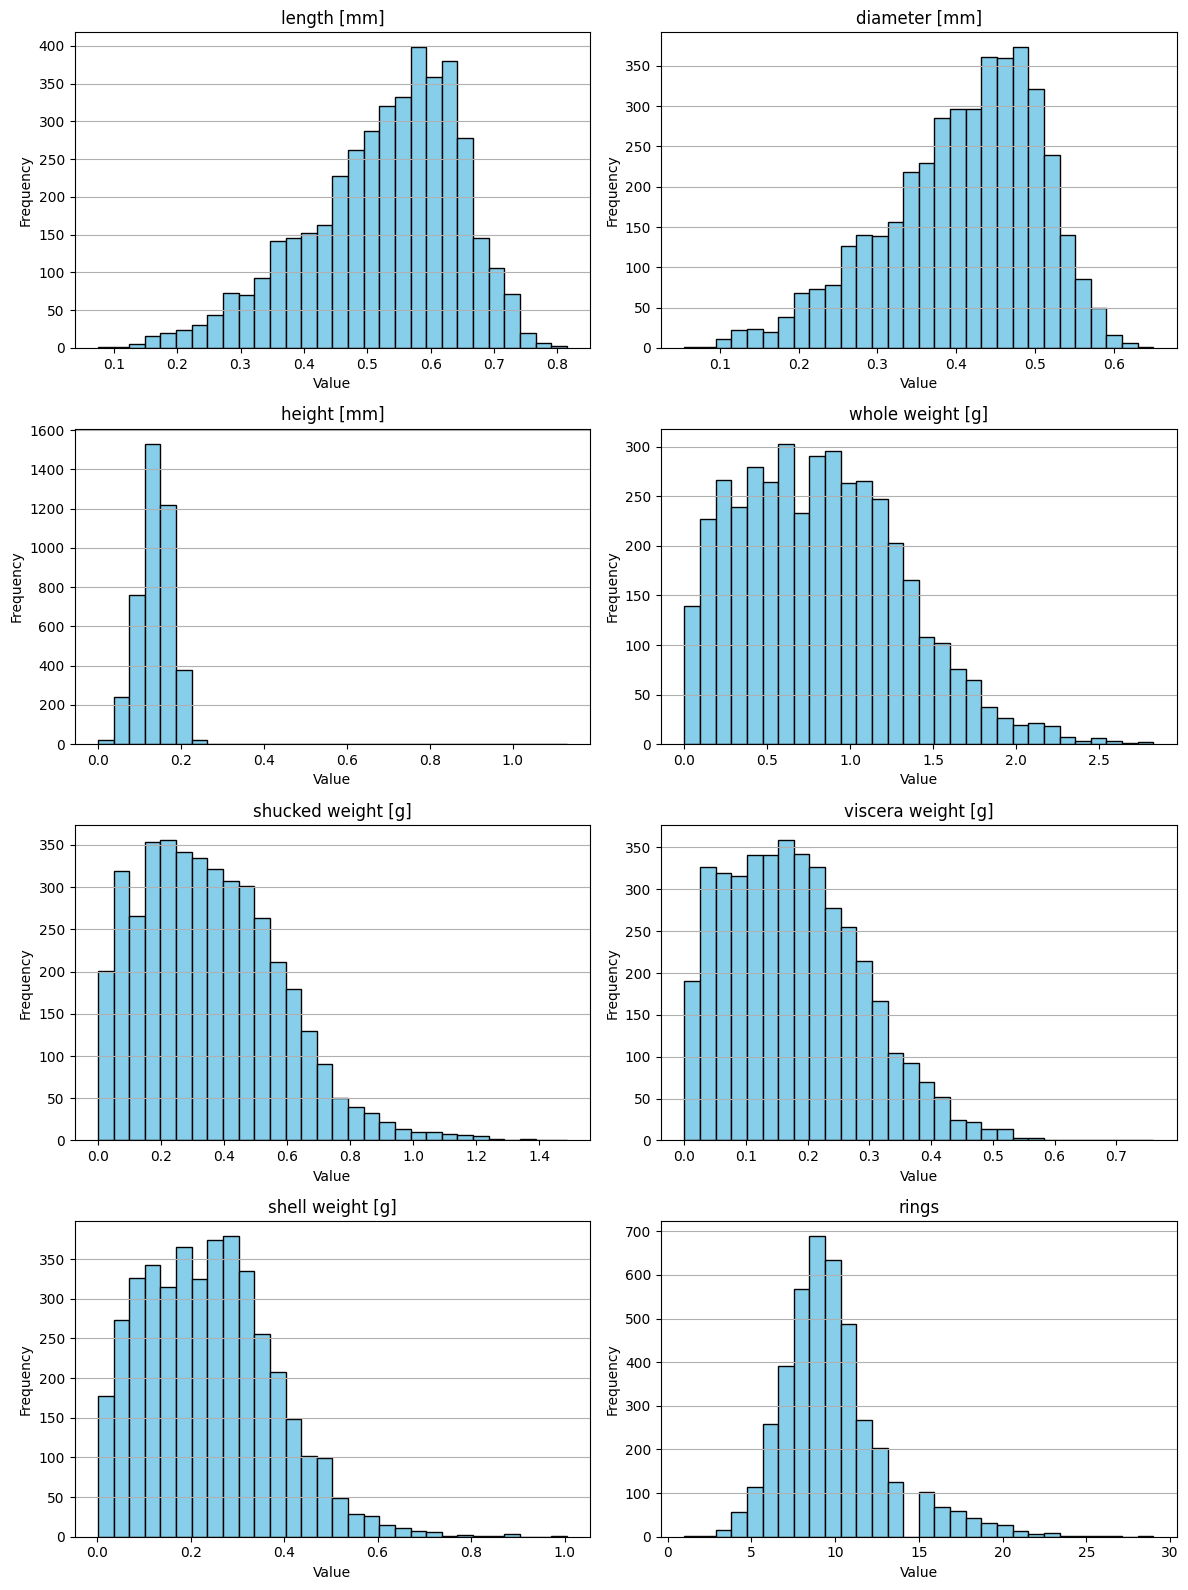

In [100]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()
quantitative_variables = data.drop(columns='sex')
for i, var in enumerate(quantitative_variables):
    axes[i].hist(data[var], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(var)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()